# Analysis Notebook – Customer Personality EDA

This notebook focuses on exploratory data analysis (EDA):

- Missing entries
- Normality of numerical features
- Redundant features (constant/duplicates)
- Correlations among numerical features
- Cardinality of categorical features
- Balance of binary features

Dataset: `marketing_campaign.csv`


In [20]:
# Setup: minimal imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 120


In [21]:
# Data loading
DATA_PATH = 'marketing_campaign.csv'  # relative to this notebook directory

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Could not find {DATA_PATH}. Make sure it is in the same folder.")

raw = pd.read_csv(DATA_PATH, sep='\t')
df = raw.copy()
print('Loaded shape:', df.shape)
df.head()


Loaded shape: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [22]:
# Overview: shape, dtypes, basic info
print('Shape:', df.shape)
print('\nDtypes:')
print(df.dtypes)

print('\nInfo:')
df.info()

print('\nSample rows:')
df.head(10)


Shape: (2240, 29)

Dtypes:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [23]:
# Missing values summary
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df) * 100).round(2)
missing = pd.DataFrame({'missing_count': missing_counts, 'missing_pct': missing_pct})
print('Missing values by column:')
print(missing[missing['missing_count'] > 0])
print(f'\nTotal missing values: {missing_counts.sum()}')


Missing values by column:
        missing_count  missing_pct
Income             24         1.07

Total missing values: 24


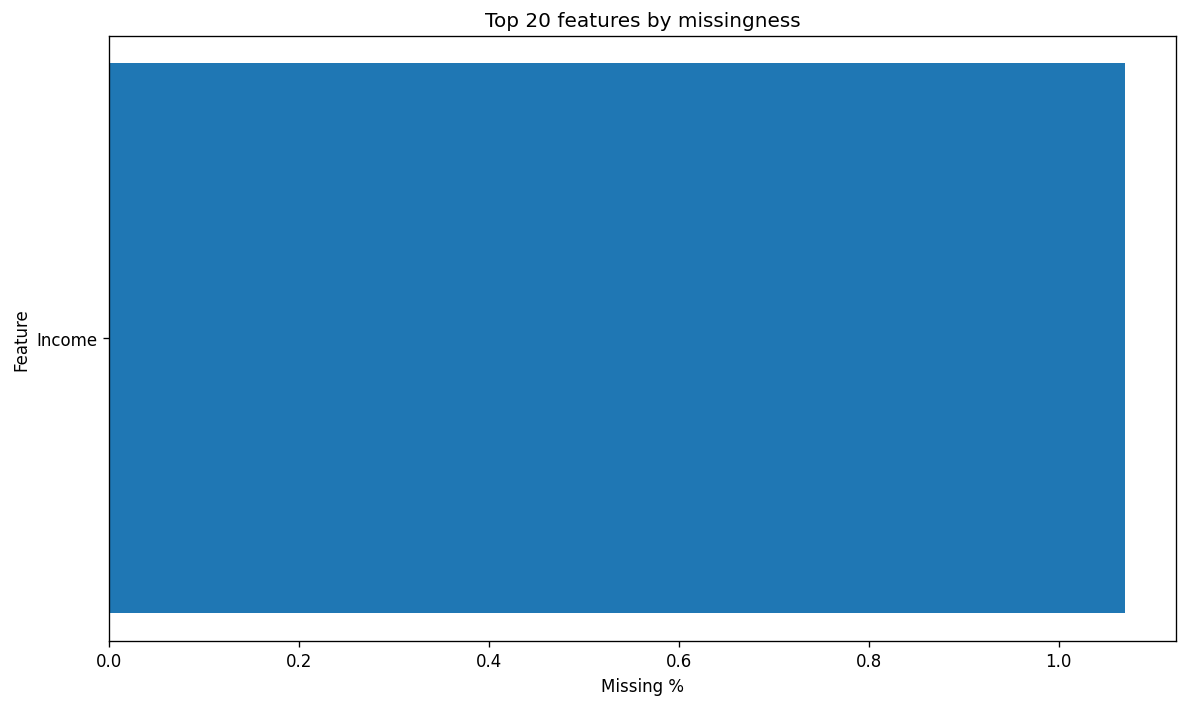

In [24]:
# Visualize missingness (top 20)
missing_nonzero = missing[missing['missing_count'] > 0].head(20)
if not missing_nonzero.empty:
    plt.barh(missing_nonzero.index, missing_nonzero['missing_pct'])
    plt.xlabel('Missing %')
    plt.ylabel('Feature')
    plt.title('Top 20 features by missingness')
    plt.tight_layout()
    plt.show()
else:
    print('No missing values found.')


Numeric columns (26): ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases'] ...


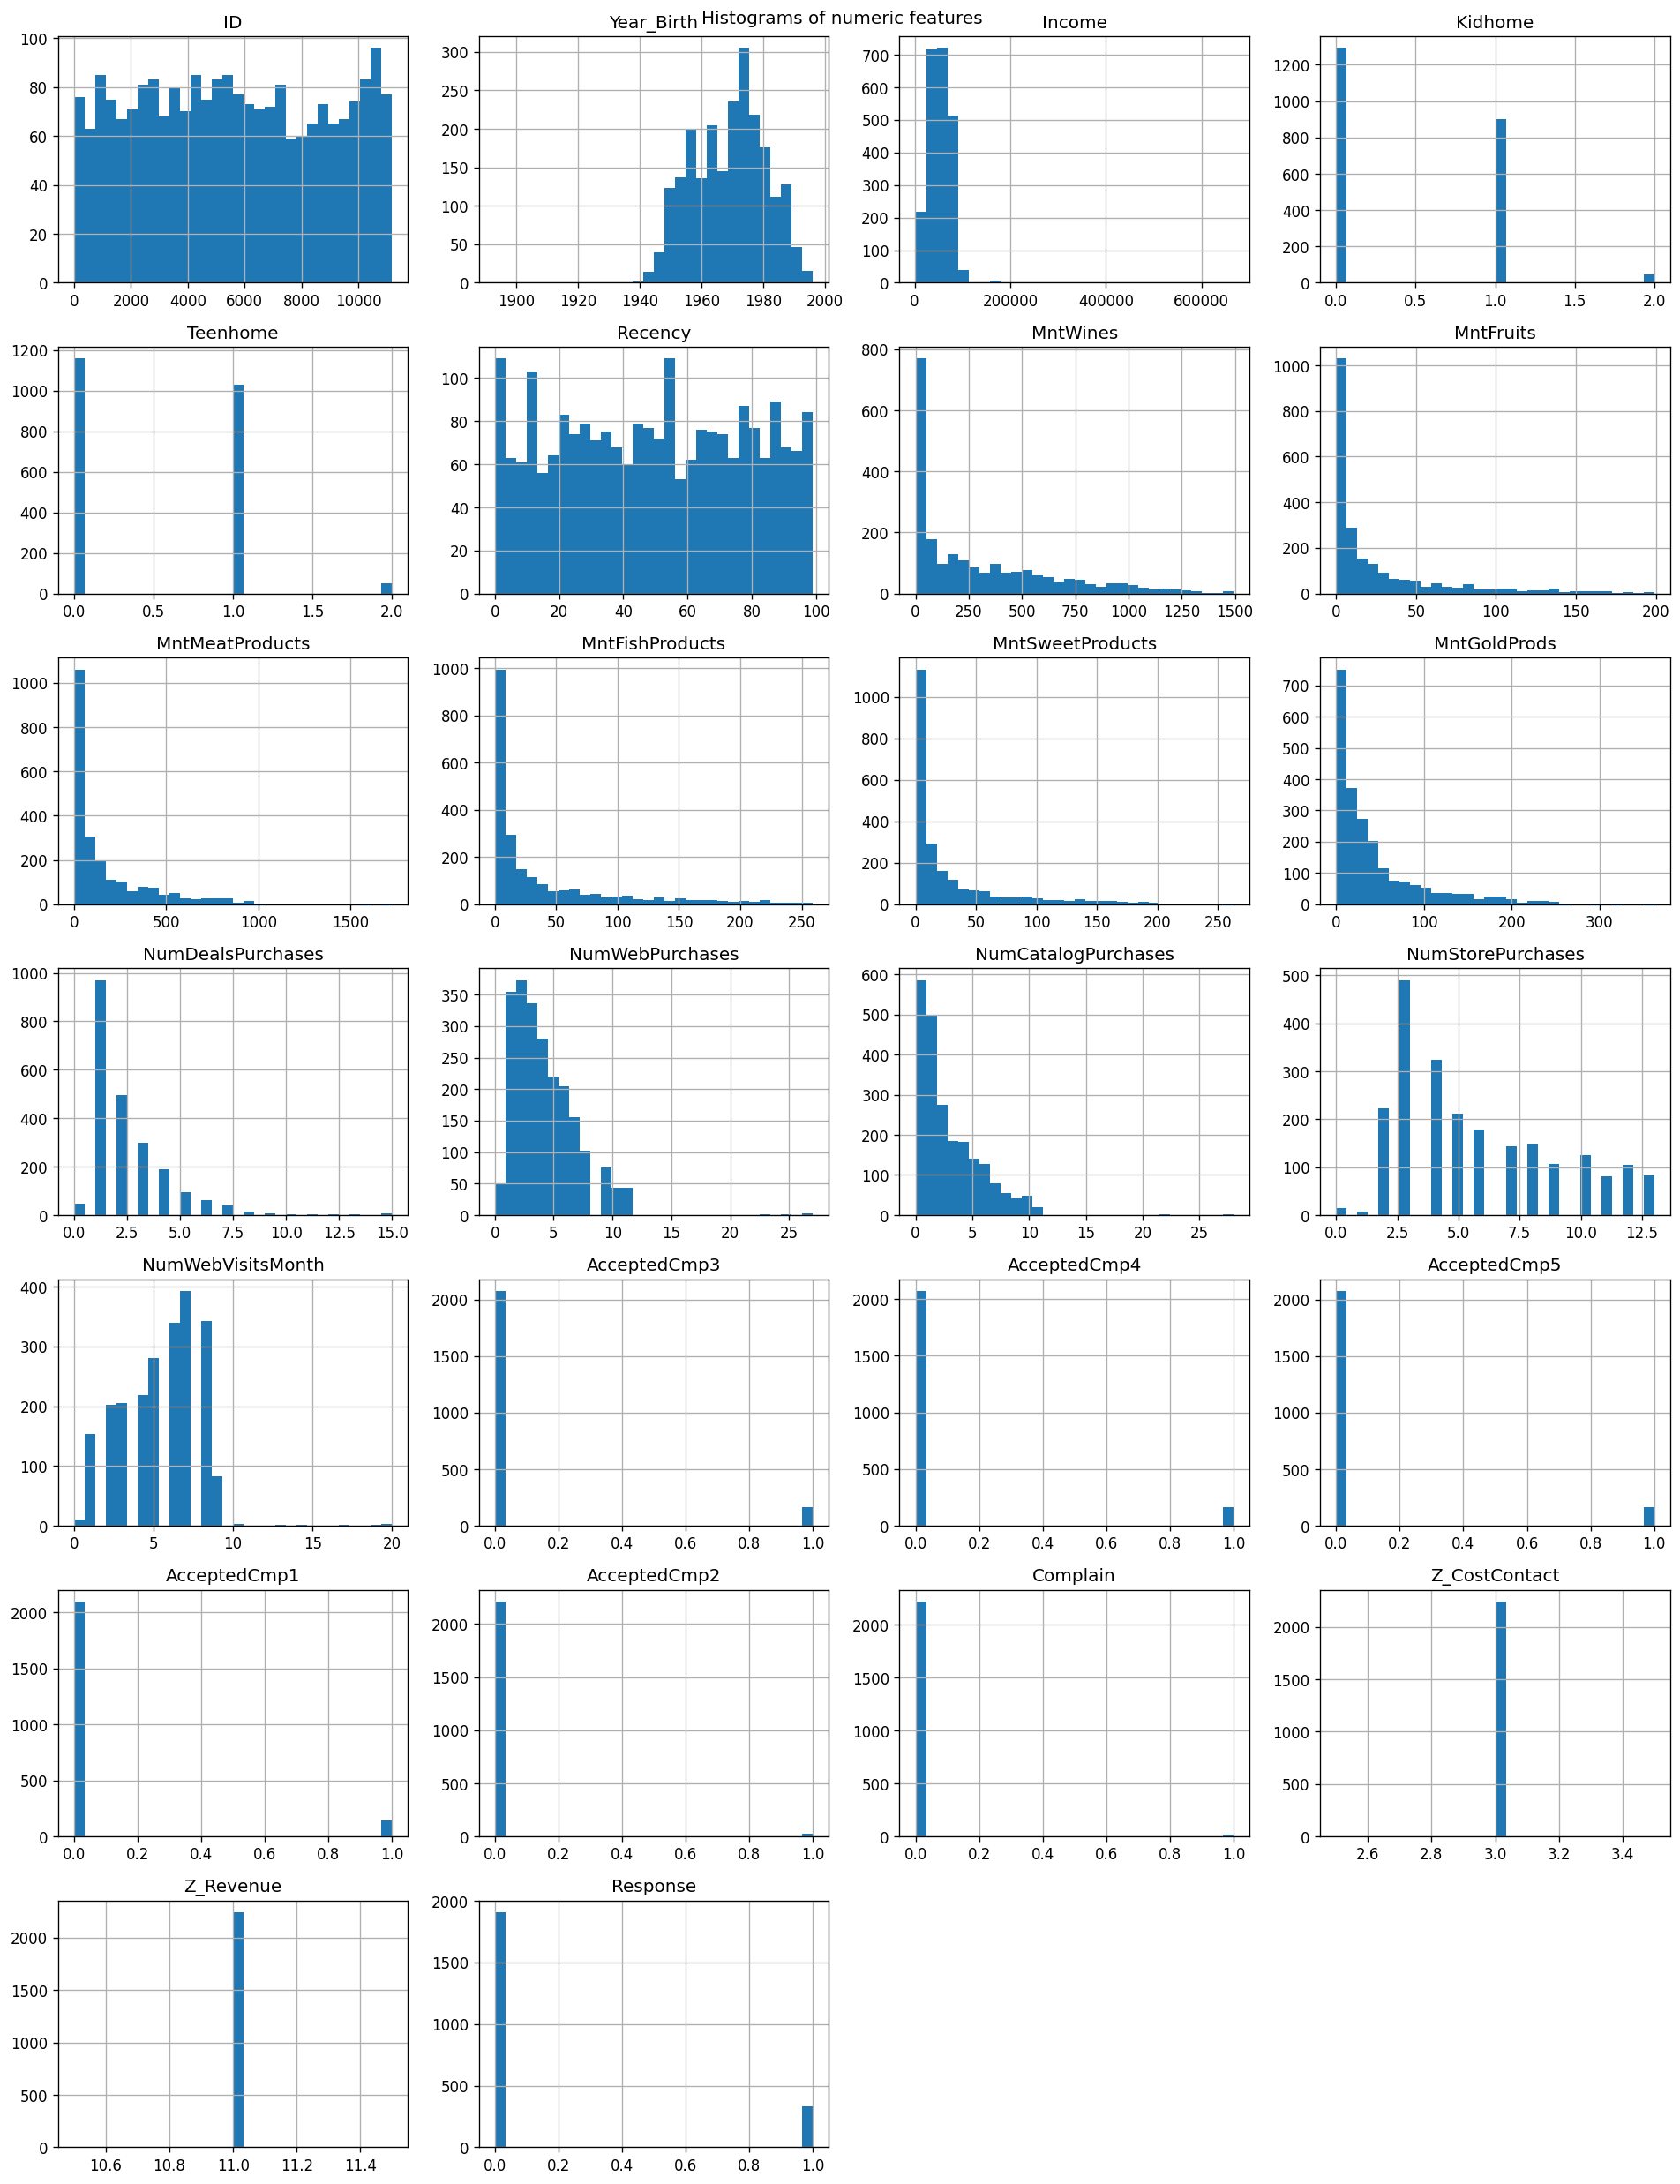

In [25]:
# Normality checks: histograms for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f'Numeric columns ({len(numeric_cols)}):', numeric_cols[:15], '...')

if numeric_cols:
    # Calculate optimal layout dynamically
    n_features = len(numeric_cols)
    n_cols = min(4, int(np.ceil(np.sqrt(n_features))))  # Max 4 cols, or sqrt if fewer
    n_rows = int(np.ceil(n_features / n_cols))
    
    df[numeric_cols].hist(bins=30, figsize=(4 * n_cols, 3 * n_rows), layout=(n_rows, n_cols))
    plt.suptitle('Histograms of numeric features')
    plt.tight_layout()
    plt.show()
else:
    print('No numeric columns found.')


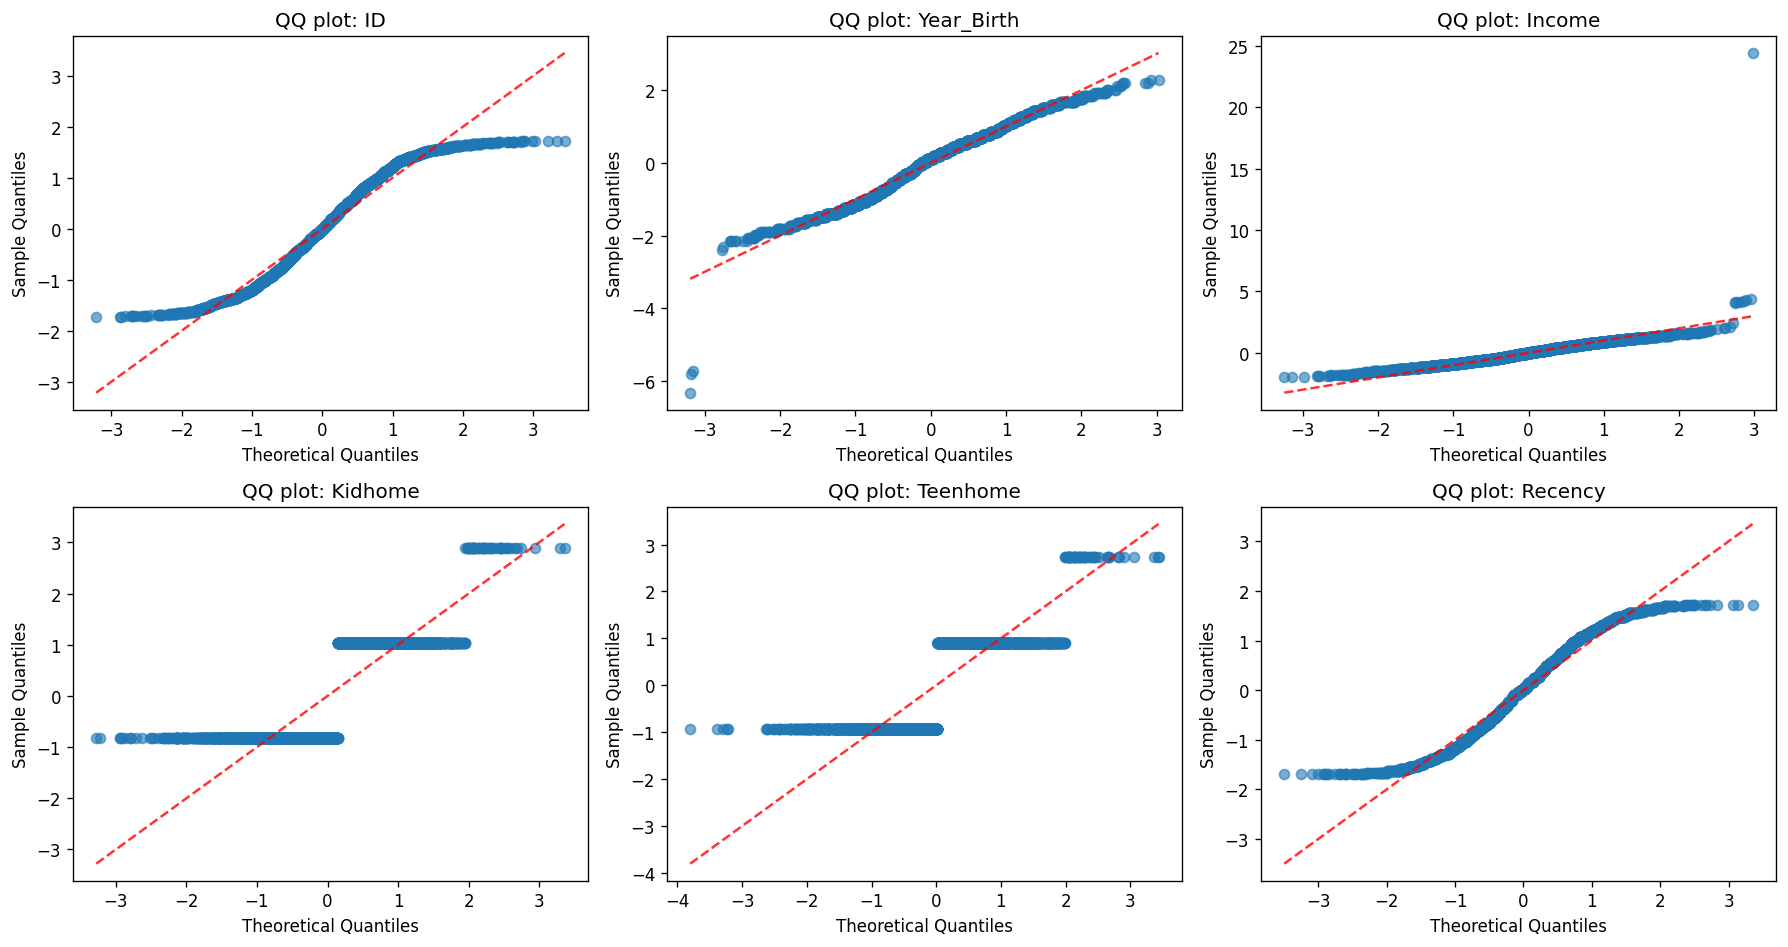

In [26]:
# Normality checks: simple QQ plots using numpy
def simple_qq_plot(data, ax, title):
    """Simple QQ plot using sorted data vs theoretical quantiles"""
    data_clean = data.dropna()
    n = len(data_clean)
    if n == 0:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)
        return
    
    # Standardize the data first
    data_std = (data_clean - data_clean.mean()) / data_clean.std()
    
    # Theoretical quantiles (normal distribution)
    theoretical = np.sort(np.random.normal(0, 1, n))
    # Sample quantiles
    sample = np.sort(data_std)
    
    ax.scatter(theoretical, sample, alpha=0.6)
    ax.plot([theoretical.min(), theoretical.max()], [theoretical.min(), theoretical.max()], 'r--', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

qq_features = numeric_cols[:6]
if qq_features:
    n = len(qq_features)
    rows = int(np.ceil(n / 3))
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
    axes = axes.flatten() if n > 1 else [axes]
    for i, col in enumerate(qq_features):
        simple_qq_plot(df[col], axes[i], f'QQ plot: {col}')
    # hide empty axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print('No numeric columns for QQ plots.')


In [33]:
# Normality tests for numeric features
from scipy import stats

print("=== NORMALITY ANALYSIS ===")
print("Testing normality using Shapiro-Wilk test (p > 0.05 suggests normality)")
print("Note: With large samples (n > 5000), even small deviations from normality will be significant")
print()

normality_results = []
for col in numeric_cols:
    data = df[col].dropna()
    if len(data) > 3:  # Need at least 3 points for test
        # For large samples, use a subset to avoid memory issues
        if len(data) > 5000:
            data_sample = data.sample(5000, random_state=42)
        else:
            data_sample = data
            
        stat, p_value = stats.shapiro(data_sample)
        normality_results.append({
            'feature': col,
            'shapiro_stat': stat,
            'p_value': p_value,
            'is_normal': p_value > 0.05,
            'sample_size': len(data_sample)
        })

normality_df = pd.DataFrame(normality_results)
normality_df = normality_df.sort_values('p_value', ascending=False)

print("Normality test results:")
print(normality_df[['feature', 'p_value', 'is_normal']].to_string(index=False))

normal_features = normality_df[normality_df['is_normal']]['feature'].tolist()
print(f"\nFeatures that appear approximately normal (p > 0.05): {len(normal_features)}")
print(normal_features)

non_normal_features = normality_df[~normality_df['is_normal']]['feature'].tolist()
print(f"\nFeatures that are NOT normal (p ≤ 0.05): {len(non_normal_features)}")
print(non_normal_features)


=== NORMALITY ANALYSIS ===
Testing normality using Shapiro-Wilk test (p > 0.05 suggests normality)
Note: With large samples (n > 5000), even small deviations from normality will be significant

Normality test results:
            feature      p_value  is_normal
          Z_Revenue 1.000000e+00       True
      Z_CostContact 1.000000e+00       True
         Year_Birth 4.518501e-19      False
            Recency 5.682849e-26      False
                 ID 5.647030e-26      False
  NumWebVisitsMonth 3.519339e-31      False
  NumStorePurchases 2.596487e-35      False
    NumWebPurchases 3.073409e-36      False
           MntWines 5.706296e-43      False
NumCatalogPurchases 4.821938e-45      False
             Income 8.245966e-48      False
       MntGoldProds 1.030053e-48      False
  NumDealsPurchases 1.550595e-50      False
    MntMeatProducts 3.656337e-51      False
    MntFishProducts 1.954644e-52      False
           Teenhome 2.836092e-53      False
          MntFruits 1.542400e-53  

/home/fer/Documents/CSI5155/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
# Redundancy checks: constant and duplicate columns
constant_cols = [c for c in df.columns if df[c].nunique(dropna=False) <= 1]
print('Constant columns:', constant_cols)

# Duplicate columns
dup_mask = df.T.duplicated()
duplicate_groups = {}
if dup_mask.any():
    transposed = df.T
    for col in transposed.index[dup_mask]:
        original = transposed.index[(transposed == transposed.loc[col]).all(axis=1)].tolist()[0]
        duplicate_groups.setdefault(original, []).append(col)
    print('Duplicate column groups:')
    for base, dups in duplicate_groups.items():
        print(f'  {base} <- duplicates: {dups}')
else:
    print('No duplicate columns found.')


Constant columns: ['Z_CostContact', 'Z_Revenue']
No duplicate columns found.


Correlation matrix (first 10x10):
                    ID  Year_Birth  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts
ID               1.000       0.000   0.013    0.002    -0.003   -0.047    -0.023      0.005           -0.004           -0.024
Year_Birth       0.000       1.000  -0.162    0.230    -0.352   -0.020    -0.158     -0.018           -0.031           -0.042
Income           0.013      -0.162   1.000   -0.429     0.019   -0.004     0.579      0.431            0.585            0.439
Kidhome          0.002       0.230  -0.429    1.000    -0.036    0.009    -0.496     -0.373           -0.437           -0.388
Teenhome        -0.003      -0.352   0.019   -0.036     1.000    0.016     0.005     -0.177           -0.261           -0.204
Recency         -0.047      -0.020  -0.004    0.009     0.016    1.000     0.016     -0.004            0.023            0.001
MntWines        -0.023      -0.158   0.579   -0.496     0.005    0.016     1.000    

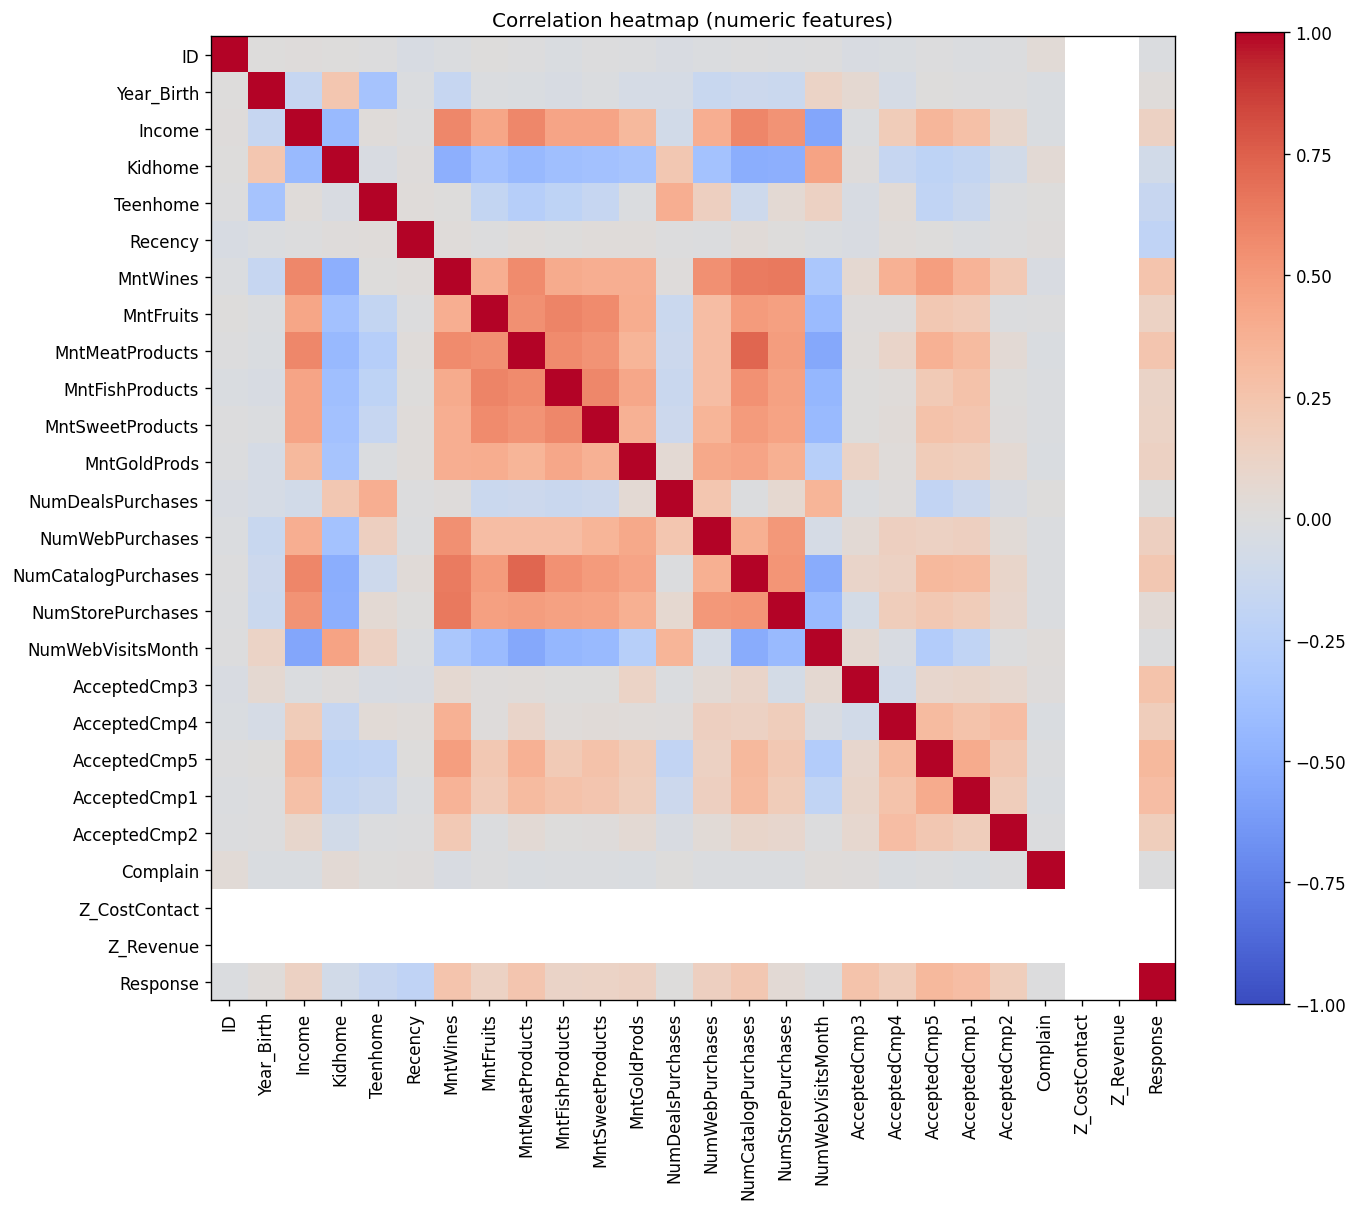

In [28]:
# Correlation matrix and heatmap
if numeric_cols:
    corr = df[numeric_cols].corr(numeric_only=True)
    print('Correlation matrix (first 10x10):')
    print(corr.iloc[:10, :10].round(3))
    
    plt.figure(figsize=(12, 10))
    plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title('Correlation heatmap (numeric features)')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.tight_layout()
    plt.show()
else:
    print('No numeric columns for correlation.')


In [29]:
# Top correlated pairs (absolute)
if numeric_cols:
    corr_triu = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    pairs = (
        corr_triu.stack()
        .abs()
        .sort_values(ascending=False)
        .reset_index()
    )
    pairs.columns = ['feature_1', 'feature_2', 'abs_corr']
    print('Top 20 most correlated feature pairs:')
    print(pairs.head(20))
else:
    print('No numeric columns for correlation pairs.')


Top 20 most correlated feature pairs:
              feature_1            feature_2  abs_corr
0       MntMeatProducts  NumCatalogPurchases  0.723827
1              MntWines    NumStorePurchases  0.642100
2              MntWines  NumCatalogPurchases  0.635226
3             MntFruits      MntFishProducts  0.594804
4                Income  NumCatalogPurchases  0.589162
5                Income      MntMeatProducts  0.584633
6       MntFishProducts     MntSweetProducts  0.579870
7                Income             MntWines  0.578650
8       MntMeatProducts      MntFishProducts  0.568402
9             MntFruits     MntSweetProducts  0.567164
10             MntWines      MntMeatProducts  0.562667
11               Income    NumWebVisitsMonth  0.553088
12            MntFruits      MntMeatProducts  0.543105
13             MntWines      NumWebPurchases  0.542265
14      MntMeatProducts    NumWebVisitsMonth  0.539470
15      MntFishProducts  NumCatalogPurchases  0.534478
16               Income    

In [30]:
# Categorical cardinality summary
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'Categorical columns ({len(categorical_cols)}):', categorical_cols)
if categorical_cols:
    cat_card = df[categorical_cols].nunique(dropna=True).sort_values(ascending=False)
    print('\nCategorical cardinality:')
    print(cat_card.to_frame('unique_values'))
    
    # Show value counts for high cardinality columns
    high_card = cat_card[cat_card > 10]
    if not high_card.empty:
        print(f'\nHigh cardinality columns (>10 unique values): {list(high_card.index)}')
else:
    print('No categorical columns.')


Categorical columns (3): ['Education', 'Marital_Status', 'Dt_Customer']

Categorical cardinality:
                unique_values
Dt_Customer               663
Marital_Status              8
Education                   5

High cardinality columns (>10 unique values): ['Dt_Customer']


In [31]:
# Binary feature balance
binary_cols = [c for c in df.columns if df[c].dropna().nunique() == 2]
print(f'Binary columns ({len(binary_cols)}):', binary_cols)

if binary_cols:
    print('\nBinary feature balance:')
    for col in binary_cols:
        vc = df[col].value_counts(dropna=True)
        pct = (vc / vc.sum() * 100).round(2)
        print(f"\n{col}:")
        print(f"  Values: {vc.to_dict()}")
        print(f"  Percentages: {pct.to_dict()}")
        
        # Check for class imbalance
        min_pct = pct.min()
        if min_pct < 20:
            print(f"  ⚠️  Class imbalance detected! Minority class: {min_pct}%")
        elif min_pct < 30:
            print(f"  ⚡ Moderate imbalance: Minority class: {min_pct}%")
        else:
            print(f"  ✅ Balanced: Minority class: {min_pct}%")
else:
    print('No binary columns found.')


Binary columns (7): ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

Binary feature balance:

AcceptedCmp3:
  Values: {0: 2077, 1: 163}
  Percentages: {0: 92.72, 1: 7.28}
  ⚠️  Class imbalance detected! Minority class: 7.28%

AcceptedCmp4:
  Values: {0: 2073, 1: 167}
  Percentages: {0: 92.54, 1: 7.46}
  ⚠️  Class imbalance detected! Minority class: 7.46%

AcceptedCmp5:
  Values: {0: 2077, 1: 163}
  Percentages: {0: 92.72, 1: 7.28}
  ⚠️  Class imbalance detected! Minority class: 7.28%

AcceptedCmp1:
  Values: {0: 2096, 1: 144}
  Percentages: {0: 93.57, 1: 6.43}
  ⚠️  Class imbalance detected! Minority class: 6.43%

AcceptedCmp2:
  Values: {0: 2210, 1: 30}
  Percentages: {0: 98.66, 1: 1.34}
  ⚠️  Class imbalance detected! Minority class: 1.34%

Complain:
  Values: {0: 2219, 1: 21}
  Percentages: {0: 99.06, 1: 0.94}
  ⚠️  Class imbalance detected! Minority class: 0.94%

Response:
  Values: {0: 1906, 1: 334}
  Percentages: {0: 85.09,

## Concise EDA Summary

- Data: 2,240 rows × 29 columns; 24 missing values (only in `Income`).
- Constants: `Z_CostContact`, `Z_Revenue` (remove from modeling).
- Binary target `Complain`: extremely imbalanced (≈0.94% positives).
- Categorical: `Education`, `Marital_Status`, `Dt_Customer` (date). Consider deriving tenure from `Dt_Customer`.
- Numeric normality: most features are non-normal (skewed); use robust models or scaling.
- Strong correlations: spending and purchase counts (e.g., `MntMeatProducts` ↔ `NumCatalogPurchases`).
- Practical prep: median-impute `Income`, one-hot encode categoricals, scale numeric features for LR/SVM/KNN; trees unaffected.


In [32]:
# Summary statistics for key insights
print("=== EDA SUMMARY ===")
print(f"Dataset shape: {df.shape}")
print(f"Numeric features: {len(numeric_cols)}")
print(f"Categorical features: {len(categorical_cols)}")
print(f"Binary features: {len(binary_cols)}")
print(f"Constant features: {len(constant_cols)}")
print(f"Missing values: {missing_counts.sum()}")

if numeric_cols:
    print(f"\nNumeric feature statistics:")
    print(df[numeric_cols].describe())

print("\n=== ANALYSIS COMPLETE ===")


=== EDA SUMMARY ===
Dataset shape: (2240, 29)
Numeric features: 26
Categorical features: 3
Binary features: 7
Constant features: 2
Missing values: 24

Numeric feature statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000      2240.000000      2240.000000       2240.000000   2240.000000        2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250    49.109375   303.935714    26.302232       166.950000        37.525446         27.062946     44.021875           2.325000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538    28.962453   336.597393    39.773434       225.715373        54.628979         41.280498     52.167439           1.932238   
min        0.0000